# Макадрай Артём. Задача 14

**Импортируем всё необходимое**

In [23]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import linalg
from scipy import interpolate

**Введём начальные данные**

In [24]:
x=[0,10,20,30,40,50,60]
y=[0,5,20,46,70,102,153]

**Построим график на начальных данных**

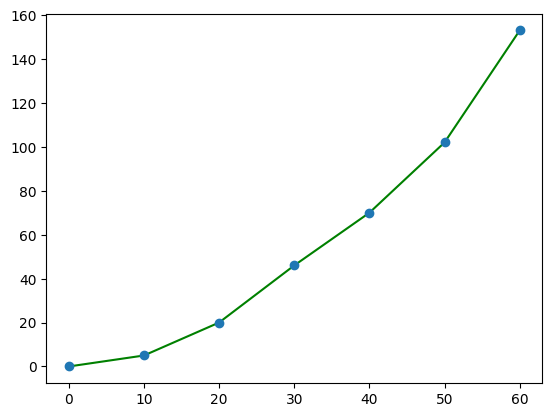

In [25]:
plt.plot(x,y,'g')
plt.plot(x,y,'o')

**Получаем необходимые нам коэффициенты с n=8 (Кол-во значений +1)**

In [26]:
k=np.polyfit(x,y,8)
print(k)
print("Коэффициэнты")

[-1.11963702e-11  8.73296986e-10  3.24866371e-08 -2.25963128e-06
 -1.58737034e-04  1.08691150e-02 -1.45213747e-01  1.04254931e+00
  0.00000000e+00]
Коэффициэнты


/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


**На основе найденных выше коэффициентов найдём y(y1) от 50 значений x(xx) в диапазоне [0,60]**

In [27]:
xx=np.linspace(min(x),max(x),50)
y1=np.polyval(k,xx)
print(y1)
print("Значения тормозного пути от скорости для кусочно-линейной интерполяции")

[  0.           1.0784535    1.83600396   2.37866885   2.8026069
   3.19362219   3.62679074   4.16621985   4.8649479    5.76499051
   6.89753614   8.28329229   9.93298112  11.8479809   14.02110753
  16.43752807  19.07579592  21.908995    24.90597803  28.03268171
  31.25349934  34.53268905  37.83579366  41.13104589  44.39073016
  47.59247022  50.7204095   53.76624844  56.73010148  59.62113332
  62.45793241  65.26857692  68.09034651  70.96903056  73.95778159
  77.1154601   80.50441484  84.18764034  88.22525093  92.67020872
  97.56324016 102.92687394 108.75853051 115.0225913  121.64137329
 128.48493256 135.35961794 141.99529367 148.03114768 153.        ]
Значения тормозного пути от скорости для кусочно-линейной интерполяции


**Находим максимальное значеиние из списка xx, y1 которого не превосходит 60 и номер последнего y1, удовлетворяющего нам**

In [28]:
i=0
for x1 in xx:
    if(y1[i]<=60):
        x_lin = x1
        j=i
    i+=1
print(x_lin,j)

35.51020408163265 29


**При точности в 50 точек получаем, что максимальная скорость равна *35.51020408163265* и номер 29**

**Посмотрим изменится ли значение, если увеличить точность до 100 точек**

In [29]:
xx=np.linspace(min(x),max(x),100)
y1=np.polyval(k,xx)
print(y1)
print("Значения тормозного пути от скорости для кусочно-линейной интерполяции")

[  0.           0.58090768   1.06935089   1.4790494    1.82316738
   2.11429454   2.36442876   2.58496039   2.78665827   2.97965746
   3.17344898   3.37687138   3.59810446   3.84466489   4.12340411
   4.44050825   4.80150033   5.21124461   5.67395312   6.19319453
   6.77190512   7.41240199   8.11639849   8.88502176   9.71883244
  10.61784638  11.58155848  12.60896839  13.69860819  14.8485718
  16.05654623  17.31984433  18.63543921  20.          21.40992896
  22.86139971  24.35039662  25.87275494  27.42420185  29.00039796
  30.59697935  32.20959976  33.83397289  35.46591459  37.10138467
  38.73652824  40.36771619  41.99158481  43.6050741   45.20546469
  46.790413    48.35798448  49.90668459  51.43548732  52.94386082
  54.43179011  55.89979623  57.34895188  58.78089293  60.19782565
  61.60252932  62.99835375  64.38921157  65.77956475  67.17440501
  68.57922791  70.          71.44311884  72.91536536  74.42384823
  75.97593979  77.57920314  79.24130991  80.96994839  82.77272138
  84.657033

In [31]:
i=0
for x1 in xx:
    if(y1[i]<=60):
        x_lin=x1
        j=i
    i+=1
print(x_lin,j)

35.151515151515156 58


**При увеличении точности результат изменился и стал *35.151515151515156***

**Построим график**

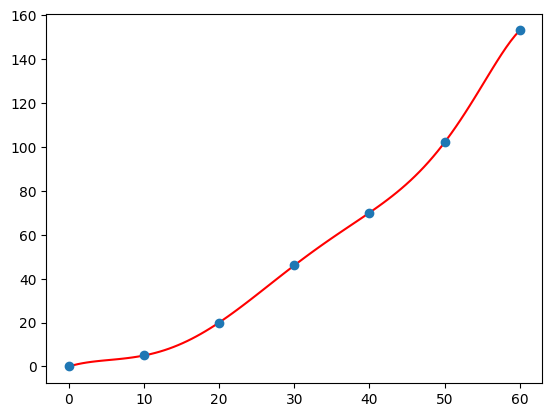

In [32]:
plt.plot(xx,y1,'r')
plt.plot(x,y,'o')

**В итоге, с помощью кусочно-линейного интерполянта мы получили значение 35.151515151515156 с точностью в 100 точек и 35.51020408163265 с точностью в 50 точек**

**Теперь приступим к решению задачи методом кучно-кубического интерполянта**

**Найдём значения y2 с точностью в 50 точек**

In [54]:
pchip = interpolate.pchip(x,y)
xx=np.linspace(min(x),max(x),50)
y2=pchip(xx)
print(y2)

[0.00000000e+00 1.07863220e-01 4.13093184e-01 8.88150346e-01
 1.50549516e+00 2.23758808e+00 3.05688956e+00 3.93586006e+00
 4.84696003e+00 5.87589500e+00 7.19747600e+00 8.77799589e+00
 1.05791680e+01 1.25627056e+01 1.46903221e+01 1.69237308e+01
 1.92246449e+01 2.16485509e+01 2.44387711e+01 2.75313763e+01
 3.08380682e+01 3.42705482e+01 3.77405179e+01 4.11596786e+01
 4.44397319e+01 4.75091216e+01 5.04312440e+01 5.32654917e+01
 5.60602082e+01 5.88637375e+01 6.17244231e+01 6.46906087e+01
 6.78106382e+01 7.11227488e+01 7.45385667e+01 7.80493369e+01
 8.16853953e+01 8.54770783e+01 8.94547220e+01 9.36486624e+01
 9.80892359e+01 1.02808307e+02 1.07894201e+02 1.13367455e+02
 1.19204113e+02 1.25380219e+02 1.31871816e+02 1.38654950e+02
 1.45705663e+02 1.53000000e+02]


In [55]:
i=0
for x2 in xx:
    if(y2[i]<=60):
        x_cub=x2
        j=i
    i+=1
print(x_cub,j)

35.51020408163265 29


**При точности в 50 точек получаем такое же значение, как и в кусочно-линейном методе при точности в 50 точек (*35.51020408163265*) и y2 под номером 29**

**Теперь увеличим точность до 100 точек**

In [57]:
xx=np.linspace(min(x),max(x),100)
y2=pchip(xx)
print(y2)

[0.00000000e+00 2.69916799e-02 1.05740602e-01 2.32907588e-01
 4.05153463e-01 6.19139049e-01 8.71525169e-01 1.15897265e+00
 1.47814230e+00 1.82569497e+00 2.19829145e+00 2.59259259e+00
 3.00525920e+00 3.43295211e+00 3.87233214e+00 4.32006011e+00
 4.77279684e+00 5.23725463e+00 5.76991442e+00 6.37623972e+00
 7.05158825e+00 7.79131773e+00 8.59078591e+00 9.44535050e+00
 1.03503692e+01 1.13011999e+01 1.22932001e+01 1.33217277e+01
 1.43821403e+01 1.54697957e+01 1.65800517e+01 1.77082659e+01
 1.88497961e+01 2.00000000e+01 2.12062731e+01 2.25119684e+01
 2.39063796e+01 2.53788004e+01 2.69185248e+01 2.85148463e+01
 3.01570590e+01 3.18344564e+01 3.35363325e+01 3.52519809e+01
 3.69706956e+01 3.86817702e+01 4.03744985e+01 4.20381744e+01
 4.36620916e+01 4.52355439e+01 4.67515743e+01 4.82281850e+01
 4.96742967e+01 5.10957709e+01 5.24984695e+01 5.38882540e+01
 5.52709861e+01 5.66525276e+01 5.80387402e+01 5.94354854e+01
 6.08486251e+01 6.22840208e+01 6.37475344e+01 6.52450274e+01
 6.67823615e+01 6.836539

In [60]:
from re import I
i=0
for x2 in xx:
    if(y2[i]<=60):
        x_cub=x2
        j=i
    i+=1
print(x_cub,j)

35.75757575757576 59


**При точности в 100 точек получаем результат отличающийся от кусочно-линейного метода (*35.75757575757576*)**

**Построим график**

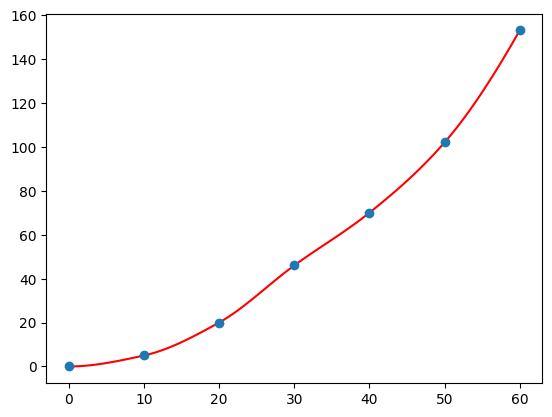

In [61]:
plt.plot(xx,y2,'r')
plt.plot(x,y,'o')

**На основе данных полученных, с помощью метода кусочно-линейной интерполяции и метода кусочно-кубической, получаем такой результат:**

In [62]:
print("x_lin = ",x_lin)
print("x_cub = ",x_cub)

x_lin =  35.151515151515156
x_cub =  35.75757575757576


**3 метод реальзовать пока не смог**